In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Problem 3: Greedy Initialization of k-means

In this problem, you will compare two different initializations of the k-means algorithm.

Let's consider the following dataset

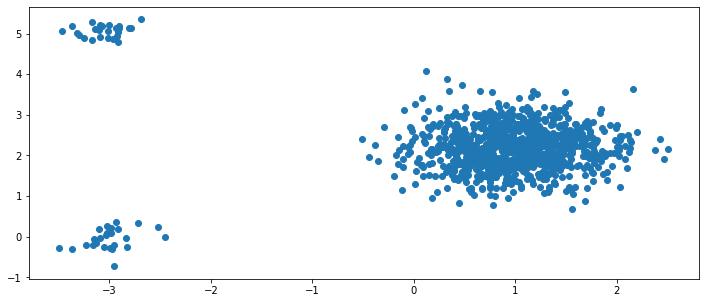

In [2]:
X = np.zeros((1000,2))

X[0:25] = 0.2*np.random.randn(25,2) + [-3,0] # blob 1
X[25:50] = 0.2*np.random.randn(25,2) + [-3,5] # blob 2
X[50:1000] = 0.5*np.random.randn(950,2) + [1,2.25] # blob 3

plt.figure(figsize=(12,5))
plt.scatter(X[:,0],X[:,1])

This dataset has three clusters (one big blog, and two smaller blobs).

**Random initialization:** the initial cluster's centers are randomly chosen from the dataset points.

In [3]:
k = 3 # nuber of clusters
m = 1000 # number of datapoints
means = X[np.random.choice(m,k)] # initial k means

In [4]:
# initial clusters
dist = pairwise_distances(X,means)
clusters = np.argmin(dist, axis=1)

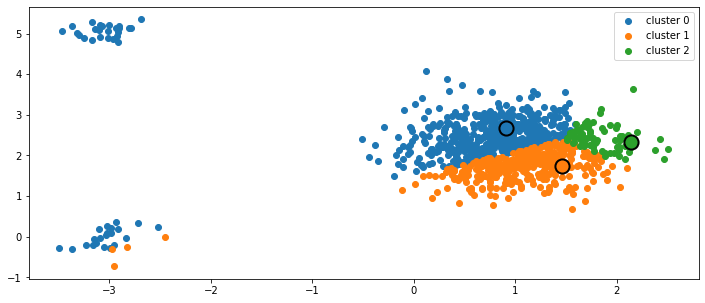

In [5]:
plt.figure(figsize=(12,5))
colors = ['C0','C1','C2']
for i in range(k):
    # plot dataset points
    plt.scatter(X[clusters==i,0],X[clusters==i,1],color=colors[i], label = 'cluster '+str(i))
    # plot cluster mean'
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')
plt.legend()

**Greedy initialization:** consider the following initialization method which we denote as the *greedy initialization method*:

- For the first cluster center, pick one of the dataset points at random.
- Pick each remaining cluster center as the dataset point as far from the previous centers as possible.

## Part 1

Compute the initial clusters (with k=3) if the initial cluster's centers are chosen using the greedy initialization.

In [12]:
k = 3
n = 2
means = np.zeros((k,n))
means[0] = X[np.random.choice(m,1)]
for i in range(1,k):
    dist = np.sum(pairwise_distances(X,means[0:i]),axis=1)
    means[i] = X[np.argmax(dist)]

In [13]:
# initial clusters
dist = pairwise_distances(X,means)
clusters = np.argmin(dist, axis=1)

## Part 2

Plot the initial clusters

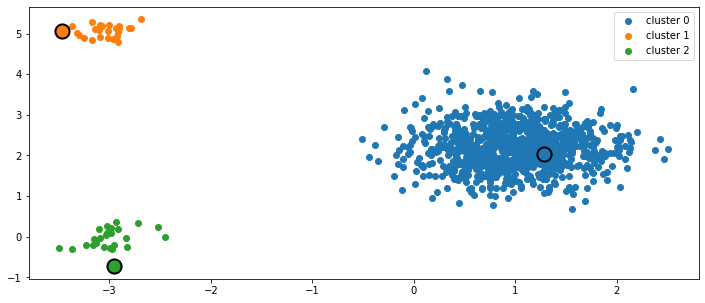

In [14]:
plt.figure(figsize=(12,5))
colors = ['C0','C1','C2']
for i in range(k):
    # plot dataset points
    plt.scatter(X[clusters==i,0],X[clusters==i,1],color=colors[i], label = 'cluster '+str(i))
    # plot cluster mean'
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')
plt.legend()